# **Day 3 Assignment - Rizqillah Zahra**

**Studi Kasus: Keadaan geografis dan ekonomi dari 194 negara pada tahun 2011.**

**Step 0: Import library yang dibutuhkan**

In [1]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'google.colab'

**Step 1A: Read file data berupa file .csv dari google drive**

In [3]:
link = 'https://drive.google.com/file/d/1ys0Su55WiRdEWYCPeuJhuKgeN8uxHMUF/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data_trial_class(1).csv') 
 
df = pd.read_csv('data_trial_class(1).csv')

**Step 1B: Melihat data sekilas dengan data 5 teratas**

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
3,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246
4,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,14.17,5.34,0.040,0.180,0.780


**Step 1C: Melihat info dari data berupa total baris, total kolom, total data tiap baris & kolom, missing values, serta tipe data setiap kolom**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             194 non-null    object 
 1   Region                              194 non-null    object 
 2   Population                          194 non-null    int64  
 3   Area (sq. mi.)                      194 non-null    int64  
 4   Pop. Density (per sq. mi.)          194 non-null    float64
 5   Coastline (coast/area ratio)        194 non-null    float64
 6   Net migration                       194 non-null    float64
 7   Infant mortality (per 1000 births)  194 non-null    float64
 8   GDP ($ per capita)                  194 non-null    float64
 9   Literacy (%)                        194 non-null    float64
 10  Phones (per 1000)                   194 non-null    float64
 11  Arable (%)                          194 non-n

**Step 1D: Melihat nilai statistik dari setiap kolom numerik**

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,1.940000e+02,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.347818e+07,6.860004e+05,285.991237,15.635670,-0.093763,38.678351,9451.546392,82.164948,212.639691,14.426031,4.339485,81.234072,22.703711,9.557732,0.154175,0.289763,0.555552
std,1.269602e+08,1.917360e+06,1327.760940,71.236857,4.642243,36.622435,10142.514158,19.895869,209.254387,13.409425,7.870315,16.268580,11.359592,5.194357,0.149938,0.139616,0.164883
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.349476e+06,2.039725e+04,26.750000,0.092500,-1.032500,8.987500,1825.000000,70.100000,28.250000,3.805000,0.232500,71.357500,13.347500,5.880000,0.038000,0.200000,0.425250
50%,6.881405e+06,1.195100e+05,69.800000,0.540000,0.000000,24.245000,5400.000000,90.950000,140.350000,10.690000,1.055000,85.540000,19.320000,8.215000,0.099500,0.275000,0.560000
75%,2.238307e+07,5.116955e+05,177.750000,4.897500,0.675000,62.575000,13700.000000,97.975000,339.600000,21.057500,4.520000,94.550000,30.865000,11.715000,0.229250,0.351500,0.670750
max,1.313974e+09,1.707520e+07,16183.000000,870.660000,23.060000,191.190000,55100.000000,100.000000,898.000000,62.110000,48.960000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


**Step 1E: Melihat nilai statistik termasuk tipe data objek**

In [7]:
df.describe(include="object")

,Country,Region
count,194,194
unique,194,11
top,Afghanistan,SUB-SAHARAN AFRICA
freq,1,49


**Step 1F: Rename Column**

In [8]:
df.rename(columns = {'Area (sq. mi.)':'Area',
                     'Pop. Density (per sq. mi.)':'Population_Density',
                     'Coastline (coast/area ratio)':'Coastline',
                     'Infant mortality (per 1000 births)':'Infant_mortality',
                     'GDP ($ per capita)':'GDP',
                     'Literacy (%)':'Percentage_Literacy',
                     'Net migration':'Net_Migration',
                     'Phones (per 1000)':'Phones',
                     'Arable (%)':'Percentage_Arable',
                     'Other (%)':'Percentage_Uses_Land',
                     'Crops (%)':'Percentage_Crops',
                     }, inplace = True)

**Step 1G: Re-check Data After Renaming Columns**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               194 non-null    object 
 1   Region                194 non-null    object 
 2   Population            194 non-null    int64  
 3   Area                  194 non-null    int64  
 4   Population_Density    194 non-null    float64
 5   Coastline             194 non-null    float64
 6   Net_Migration         194 non-null    float64
 7   Infant_mortality      194 non-null    float64
 8   GDP                   194 non-null    float64
 9   Percentage_Literacy   194 non-null    float64
 10  Phones                194 non-null    float64
 11  Percentage_Arable     194 non-null    float64
 12  Percentage_Crops      194 non-null    float64
 13  Percentage_Uses_Land  194 non-null    float64
 14  Birthrate             194 non-null    float64
 15  Deathrate             1

**Step 1H: Removing Unused Spaces**

In [10]:
df['Region'] = df['Region'].str.strip()
df['Region']

0      ASIA (EX. NEAR EAST)
1            EASTERN EUROPE
2           NORTHERN AFRICA
3        SUB-SAHARAN AFRICA
4       LATIN AMER. & CARIB
               ...         
189     LATIN AMER. & CARIB
190    ASIA (EX. NEAR EAST)
191               NEAR EAST
192      SUB-SAHARAN AFRICA
193      SUB-SAHARAN AFRICA
Name: Region, Length: 194, dtype: object

**Problem Statement:**
1. Total Region & Total Countries in Each Region
2. Median/Mean GDP from Every Region
3. Top 10 Country With The Most & Least Population
4. Income by Sectors at Each Region
5. Mean Literacy (Percentage) in Every Region
6. Birtdate & Deathrate of the Top Population Density Country

**Case 1: Total Region & Total Countries in Each Region**

In [11]:
countries_in_region = df['Region'].value_counts()
countries_in_region

SUB-SAHARAN AFRICA      49
LATIN AMER. & CARIB     42
ASIA (EX. NEAR EAST)    27
WESTERN EUROPE          20
NEAR EAST               13
C.W. OF IND. STATES     12
OCEANIA                 12
EASTERN EUROPE           8
NORTHERN AFRICA          5
NORTHERN AMERICA         3
BALTICS                  3
Name: Region, dtype: int64

Text(0, 0.5, 'Total of Countries in Region')

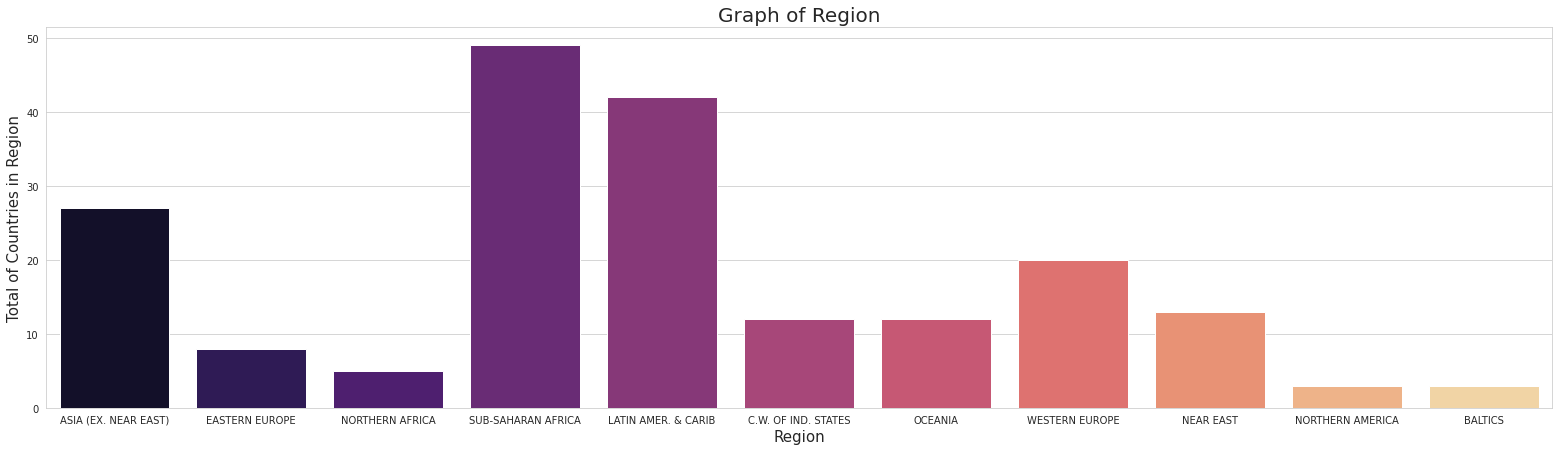

In [12]:
plt.figure(figsize=(27,7))
sns.set_style("whitegrid")
sns.countplot(x = df.Region, palette="magma")
plt.title('Graph of Region', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total of Countries in Region', fontsize=15)

**Case 2: Median/Mean GDP from Every Region**

In [13]:
mean_gdp_region = (df.groupby('Region')['GDP']
                        .mean()
                        .reset_index()
                        .sort_values(by='GDP',ascending=False))

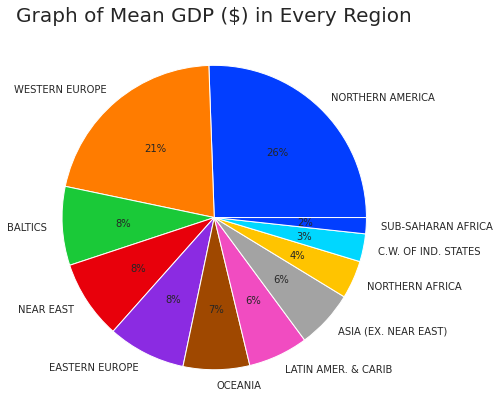

In [14]:
plt.figure(figsize=(27,7))
sns.set_style("whitegrid")
colors = sns.color_palette('bright')[0:10]
plt.pie(x = mean_gdp_region['GDP'], labels = mean_gdp_region['Region'], colors=colors, autopct='%.0f%%')

plt.title('Graph of Mean GDP ($) in Every Region', fontsize=20)
plt.show()

**Case 3: Top 10 Country With The Most & Least Population**

In [15]:
top_population_country = (df.groupby('Country')['Population']
                        .sum()
                        .reset_index()
                        .sort_values(by='Population',ascending=False)
                        .head(10))

In [16]:
top_least_population_country = (df.groupby('Country')['Population']
                        .sum()
                        .reset_index()
                        .sort_values(by='Population',ascending=True)
                        .head(10))

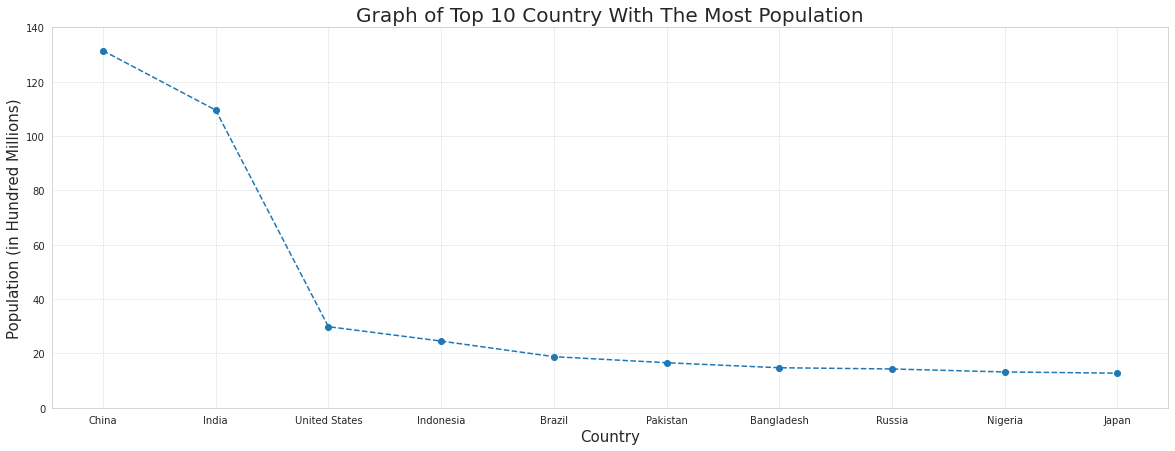

In [17]:
plt.figure(figsize=(20,7))
plt.plot(top_population_country['Country'], top_population_country['Population'], marker='o', linestyle='dashed')
plt.title('Graph of Top 10 Country With The Most Population', fontsize=20)
plt.grid(color='darkgray',linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000000).astype(int))
plt.xlabel('Country', fontsize=15)
plt.ylabel('Population (in Hundred Millions)', fontsize=15)
plt.show()

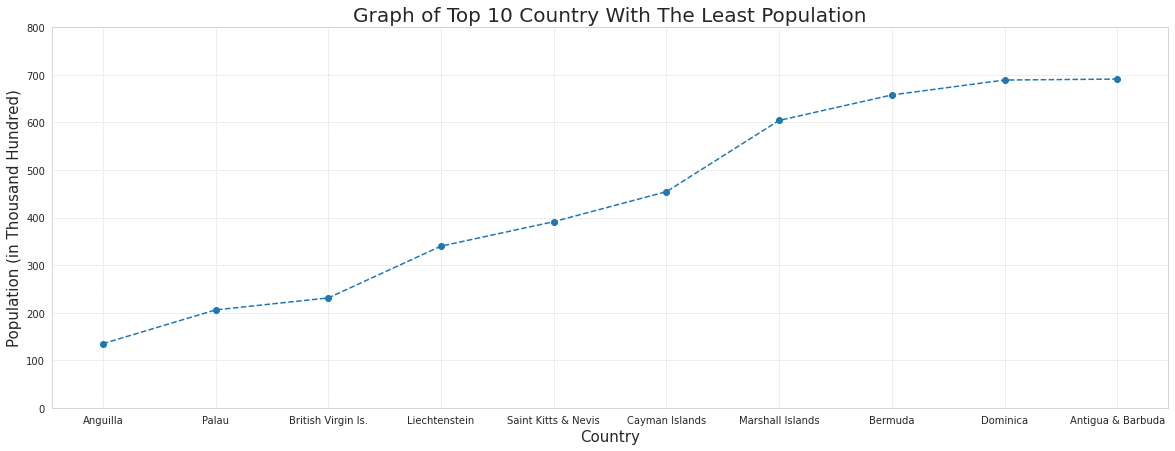

In [18]:
plt.figure(figsize=(20,7))
plt.plot(top_least_population_country['Country'], top_least_population_country['Population'], marker='o', linestyle='dashed')
plt.title('Graph of Top 10 Country With The Least Population', fontsize=20)
plt.grid(color='darkgray',linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100).astype(int))
plt.xlabel('Country', fontsize=15)
plt.ylabel('Population (in Thousand Hundred)', fontsize=15)
plt.show()

**Case 4: Percentage of Income by Sectors at Each Region**

In [31]:
sector_income_agriculture = (df.groupby('Region')['Agriculture']
                        .sum()
                        .reset_index()
                        .sort_values(by='Region',ascending=False))

In [32]:
sector_income_industry = (df.groupby('Region')['Industry']
                        .sum()
                        .reset_index()
                        .sort_values(by='Region',ascending=False))

In [34]:
sector_income_services = (df.groupby('Region')['Service']
                        .sum()
                        .reset_index()
                        .sort_values(by='Region',ascending=False))

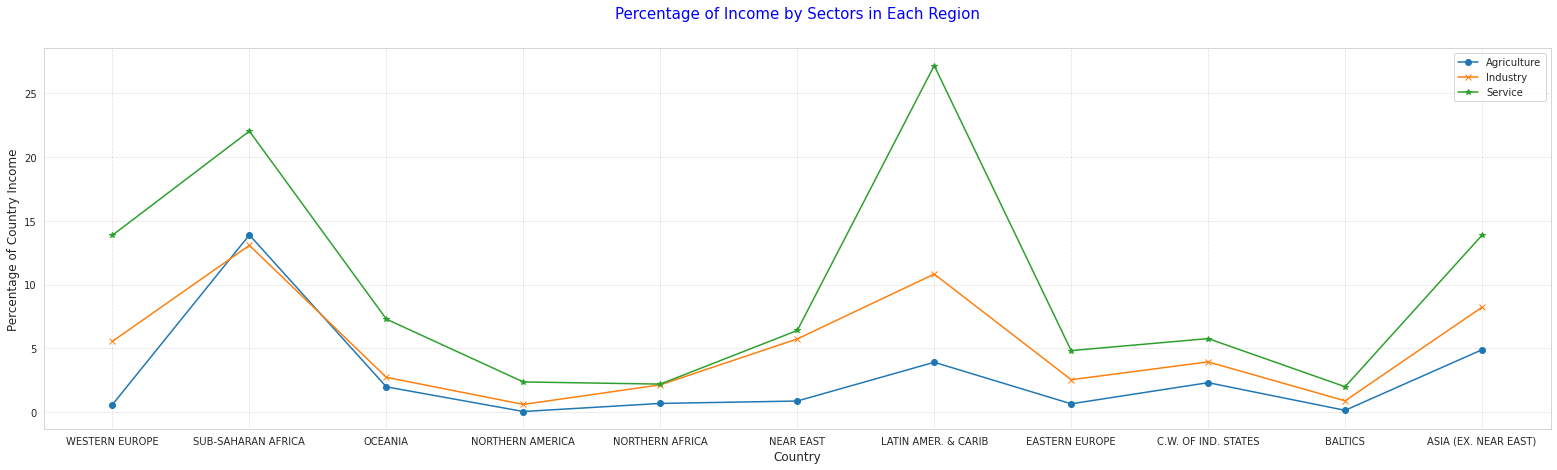

In [38]:
plt.figure(figsize=(27,7))
plt.plot(sector_income_agriculture['Region'], sector_income_agriculture['Agriculture'], marker='o')
plt.plot(sector_income_industry['Region'], sector_income_industry['Industry'], marker = 'x')
plt.plot(sector_income_services['Region'], sector_income_services['Service'], marker = '*')

plt.xlabel('Country', fontsize = 12)
plt.ylabel('Percentage of Country Income', fontsize = 12)

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

plt.title('Percentage of Income by Sectors in Each Region',loc='center',pad=30, fontsize=15, color='blue')
plt.legend(['Agriculture', 'Industry', 'Service'])

**Case 5: Percentage of Literacy in Every Region**

In [22]:
mean_literacy_region = (df.groupby('Region')['Percentage_Literacy']
                        .mean()
                        .reset_index()
                        .sort_values(by='Percentage_Literacy',ascending=False))

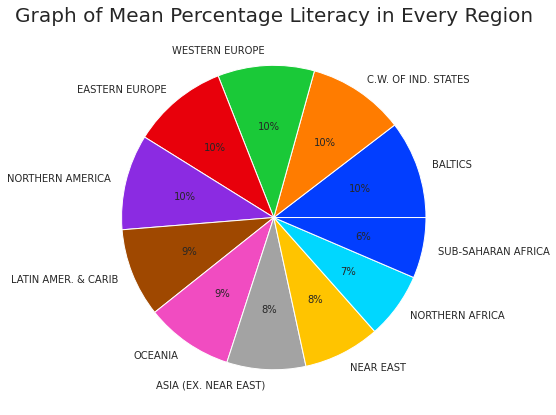

In [23]:
plt.figure(figsize=(27,7))
sns.set_style("whitegrid")
colors = sns.color_palette('bright')[0:10]
plt.pie(x = mean_literacy_region['Percentage_Literacy'], labels = mean_literacy_region['Region'], colors=colors, autopct='%.0f%%')

plt.title('Graph of Mean Percentage Literacy in Every Region', fontsize=20)
plt.show()

**Case 6: Birtdate & Deathrate of the Top Popolation Density Country**

In [24]:
biggest_population = df.loc[df['Population_Density'] >= 500]

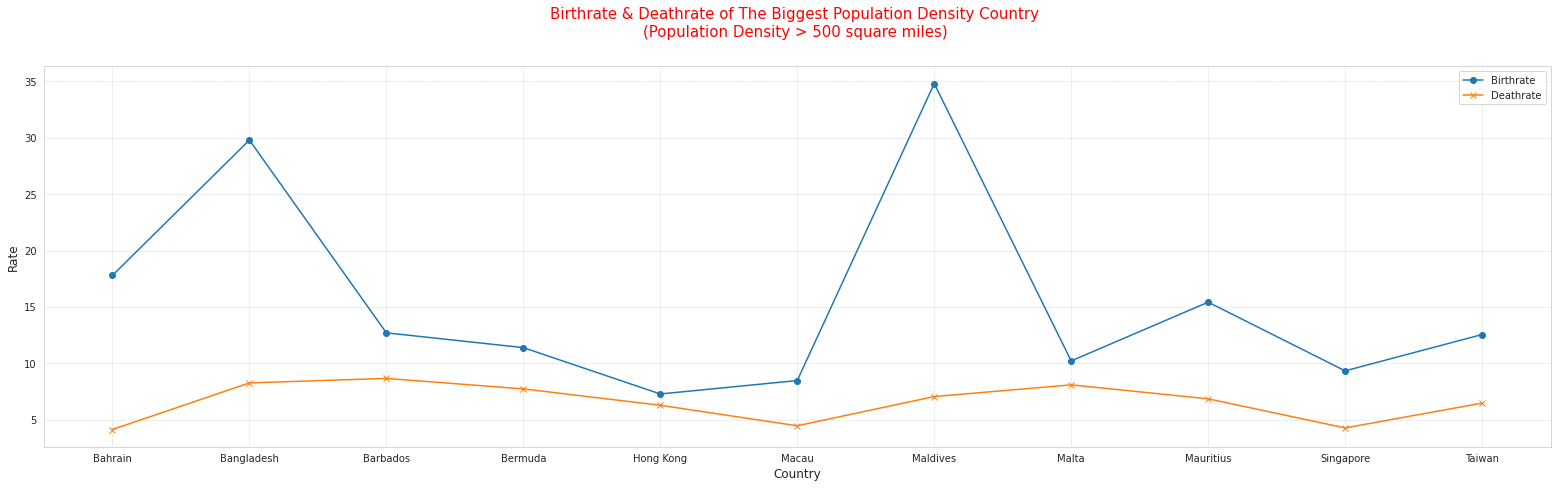

In [25]:
plt.figure(figsize=(27,7))
plt.plot(biggest_population['Country'], biggest_population['Birthrate'], marker = 'o')
plt.plot(biggest_population['Country'], biggest_population['Deathrate'], marker = 'x')

plt.xlabel('Country', fontsize = 12)
plt.ylabel('Rate', fontsize = 12)

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

plt.title('Birthrate & Deathrate of The Biggest Population Density Country \n(Population Density > 500 square miles) ',loc='center',pad=30, fontsize=15, color='red')
plt.legend(['Birthrate', 'Deathrate'])

**Case 7: Total Population in Every Region**

In [55]:
total_population = (df.groupby('Region')['Population']
                        .sum()
                        .reset_index()
                        .sort_values(by='Population',ascending=False))

Text(0.5, 0, 'Region')

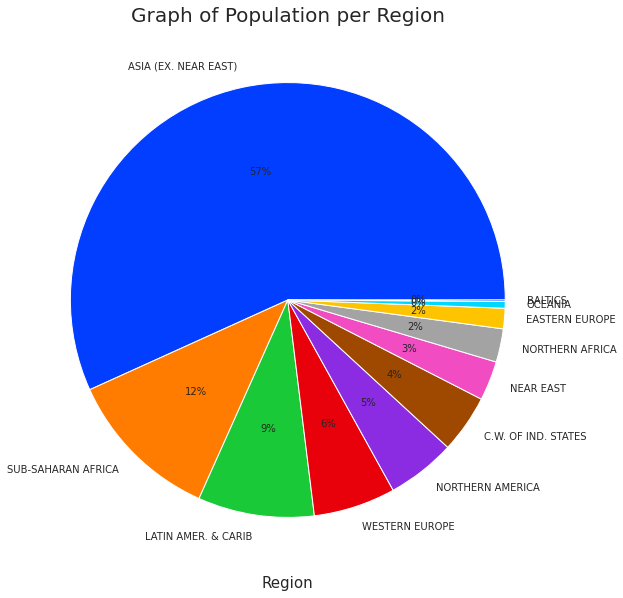

In [54]:
plt.figure(figsize=(30,10))
sns.set_style("whitegrid")
colors = sns.color_palette('bright')[0:10]
plt.pie(x = total_population['Population'], labels = total_population['Region'], colors=colors, autopct='%.0f%%')
plt.title('Graph of Population per Region', fontsize=20)
plt.xlabel('Region', fontsize=15)